In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [148]:
data = pd.read_csv('placement.csv')

In [149]:
data.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [150]:
data.shape

(200, 2)

In [151]:
data.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [152]:
print(data.isnull().sum())

cgpa       0
package    0
dtype: int64


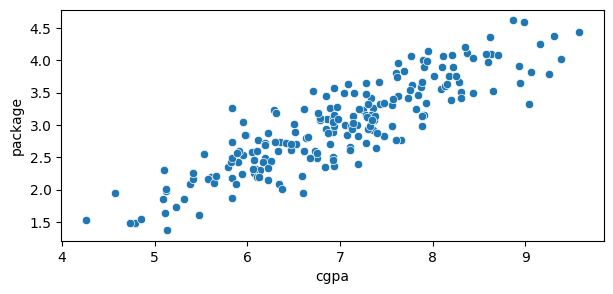

In [153]:
x = data[['cgpa']]
y = data['package']
plt.figure(figsize = (7,3))
sns.scatterplot(x = 'cgpa', y= 'package', data = data)
plt.show()


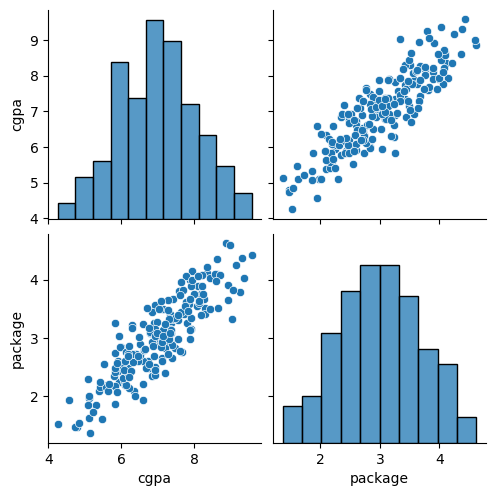

In [154]:
attribute = data.columns.values
attribute

sns.pairplot(data.loc[:,attribute])
plt.show()

In [155]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 19)

In [156]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [157]:
y_train_actual = [[4.5], [3.2], [6.5], [7.8], [2.1], [9.8], [9.3]]
y_train_pred = lr.predict(y_train_actual)
print("Actual :", y_train_actual)
print("Predicted :",y_train_pred, )

Actual : [[4.5], [3.2], [6.5], [7.8], [2.1], [9.8], [9.3]]
Predicted : [1.57719095 0.82852309 2.72898766 3.47765553 0.1950349  4.62945224
 4.34150306]


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [158]:
lr.score(x_test, y_test)*100

84.16316029332688

In [159]:
y_prediction = lr.predict(x)


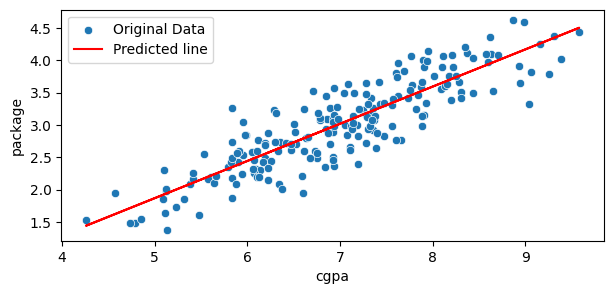

In [160]:
plt.figure(figsize = (7,3))
sns.scatterplot(x = 'cgpa', y= 'package', data = data)
plt.plot(data['cgpa'], y_prediction, color = 'r')
plt.legend(["Original Data" , "Predicted line"])
plt.show()

In [161]:
m = lr.coef_
print(m)

c = lr.intercept_
print(c)

y = m * x + c
y = m *  8.8 + c
print(y)


[0.57589836]
-1.014351648369181
[4.05355388]


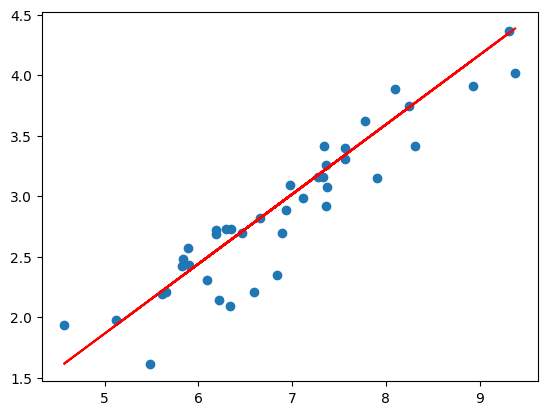

In [162]:
y_pred = lr.predict(x_test) 
plt.scatter(x_test, y_test)
plt.plot(x_test , y_pred, color = "r")
plt.show()

In [163]:
from sklearn.metrics import mean_squared_error, r2_score


y_pred = lr.predict(x_test)  # Predicted values
y_true = y_test  

# Calculate evaluation metrics

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.06222087452033196
Root Mean Squared Error: 0.24944112435669455
R-squared: 0.8416316029332689


In [164]:
### without using sklearn 

# Split the data into training and testing sets
np.random.seed(42)
shuffled_indices = np.random.permutation(len(data))
test_set_size = int(len(data) * 0.2)
test_indices = shuffled_indices[:test_set_size]
train_indices = shuffled_indices[test_set_size:]


In [165]:
train_set = data.iloc[train_indices]
test_set = data.iloc[test_indices]

x_train = train_set['cgpa'].values
y_train = train_set['package'].values
x_test = test_set['cgpa'].values
y_test = test_set['package'].values

# Calculate the mean of x and y
mean_x = np.mean(x_train)
mean_y = np.mean(y_train)


In [166]:
# Calculate the terms needed for the numerator and denominator of beta
numerator = np.sum((x_train - mean_x) * (y_train - mean_y))
denominator = np.sum((x_train - mean_x) ** 2)

# Calculate the coefficients
beta = numerator / denominator
alpha = mean_y - (beta * mean_x)

# Predict y values for the test set
y_pred = alpha + beta * x_test

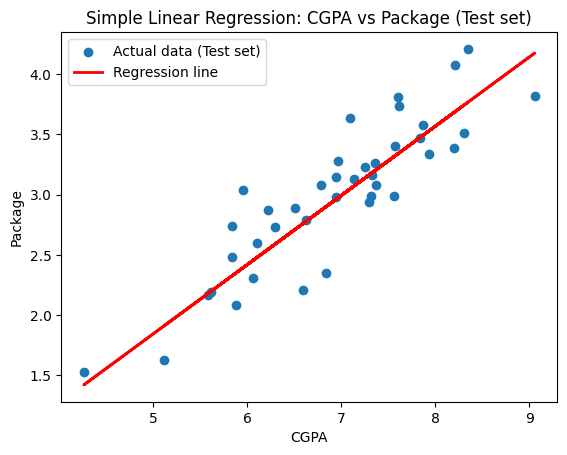

In [167]:
# Plot the regression line with test data
plt.scatter(x_test, y_test, label='Actual data (Test set)')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.title('Simple Linear Regression: CGPA vs Package (Test set)')
plt.legend()
plt.show()


In [168]:
# Print the model coefficients
print(f'Intercept (alpha): {alpha}')
print(f'Coefficient (beta): {beta}')

# Calculate and print the mean squared error for the test set
mse = np.mean((y_test - y_pred) ** 2)
# R-squared value
y_mean = np.mean(y_test)
ss_total = np.sum((y_test - y_mean) ** 2)
ss_residual = np.sum((y_test - y_pred) ** 2)
r_squared = 1 - (ss_residual / ss_total)
print(f'Mean Squared Error on test set: {mse}')
print(f'R-squared: {r_squared}')

Intercept (alpha): -1.0270069374542117
Coefficient (beta): 0.5742564727019198
Mean Squared Error on test set: 0.08417638361329664
R-squared: 0.7730984312051671
